In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.cosmology import Planck18 as cosmo
from tqdm import tqdm
from mass_assign import *
from grav_potential import *
from acceleration import *

In [22]:
ng = 16
num_par = 1000

pars_pos = (np.random.rand(num_par, 3)*ng).astype(np.float32)
pars_vel = (np.random.rand(num_par, 3)).astype(np.float32)
# pars_mass = np.random.rand(num_par).astype(np.float32)*100
pars_mass = np.ones_like(pars_pos[:,0]).astype(np.float32)

# pars_pos = np.array([[8.1,11.1],[8.1,10.1]]).astype(np.float32)
# pars_vel = np.array([[10,0],[0,0]]).astype(np.float32)
# pars_mass = np.array((0.00001,1)).astype(np.float32)

pars_df = pd.DataFrame({'pos_x': pars_pos[:,0], 'pos_y': pars_pos[:,1],'pos_z': pars_pos[:,2],
                        'vel_x': pars_vel[:,0], 'vel_y': pars_vel[:,1],'vel_z': pars_vel[:,2],
                        'mass': pars_mass})

# Info array: (num_par, 5)
# Position_x, Position_y, Velocity_x, Velocity_y, Mass
pars_info = pars_df.loc[:, ['pos_x', 'pos_y', 'pos_z', 'vel_x', 'vel_y', 'vel_z', 'mass']].values.astype(np.float32)
pars_info.shape

(1000, 7)

(0.0, 16.0)

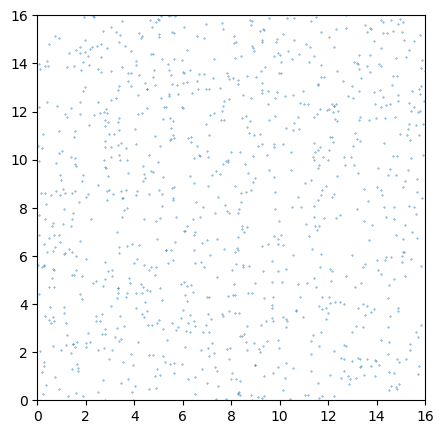

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(pars_info[:, 0], pars_info[:, 1], s=0.1,)
ax.set_ylim(0, ng)
ax.set_xlim(0, ng)

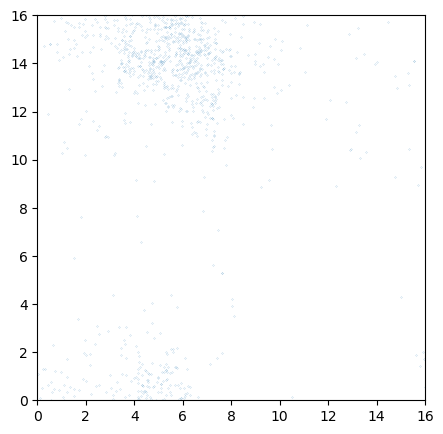

In [24]:
dt = 0.01

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.set_ylim(0, ng)
ax.set_xlim(0, ng)
for step in range(10):
    pars_info[:, 0:3] += pars_info[:, 3:6] * 0.5 * dt # Fitrst step:
    pars_info[:, 0:3] = pars_info[:, 0:3] % ng # Periodic boundary condition

    dens = cic_density_3d(pars_info[:,[0,1,2,6]], ng, h=1)
    phi = grav_phi_3d(dens, h=1)
    acc_mesh_x, acc_mesh_y, acc_mesh_z = acc_mesh_3d(phi, h=1)
    acc_par_x, acc_par_y, acc_par_z = acc_par_3d(pars_info[:,[0,1,2]], acc_mesh_x, acc_mesh_y, acc_mesh_z, h=1)

    pars_info[:, 3:6] += np.array([acc_par_x, acc_par_y, acc_par_z]).T * dt # Second step:
    pars_info[:, 0:3] += pars_info[:, 3:6] * 0.5 * dt # Third step:
    pars_info[:, 0:3] = pars_info[:, 0:3] % ng # Periodic boundary condition
ax.scatter(pars_info[:, 0], pars_info[:, 1], s=0.01,)

In [15]:
pars_info

array([[ 6.0000000e+00,  1.3218750e+01,  0.0000000e+00, ...,
         8.3393744e+07, -5.3959910e+09,  1.0000000e+00],
       [ 9.0000000e+00,  8.0000000e+00,  2.0000000e+00, ...,
         7.8362056e+09,  1.9810400e+09,  1.0000000e+00],
       [ 6.0000000e+00,  1.4750000e+01,  2.0781250e+00, ...,
         4.4733197e+08,  5.0800516e+07,  1.0000000e+00],
       ...,
       [ 9.0000000e+00,  0.0000000e+00,  2.0000000e+00, ...,
         1.4929066e+09,  4.2729917e+09,  1.0000000e+00],
       [ 6.0000000e+00,  6.0000000e+00,  3.8750000e+00, ...,
        -2.5813558e+09, -2.8788554e+08,  1.0000000e+00],
       [ 1.4000000e+01,  1.4250000e+01,  1.0000000e+01, ...,
         4.4569533e+08,  1.8575950e+07,  1.0000000e+00]], dtype=float32)

In [9]:
pars_info[:, 3]

array([ 1.45410606e+13,  1.27749105e+13,  1.53036773e+13,  1.27495077e+13,
        1.28984138e+13,  7.91019520e+12,  5.93081244e+12,  1.28709988e+13,
        1.29587248e+13,  5.95905872e+11,  1.29028273e+13,  1.28359240e+13,
        1.26441751e+13,  8.19161937e+12,  8.23155963e+12,  1.27857863e+13,
        1.27406178e+13,  1.28646927e+13,  1.45455883e+13,  1.29603962e+13,
        1.28497127e+13,  5.75810568e+12,  1.22718401e+12,  1.28620838e+13,
        1.28397072e+13,  1.28375566e+13,  1.27051676e+13,  1.11791925e+12,
        1.28496383e+13,  7.65492095e+12,  7.72770261e+12,  1.27494018e+13,
        1.32426844e+13,  1.28263704e+13,  1.31649273e+13,  1.22448327e+12,
        6.45992913e+12,  1.28483548e+13,  1.45591254e+13,  1.28525837e+13,
        1.28719698e+13,  9.49695367e+13,  1.27620832e+13,  3.08030944e+12,
        1.28315325e+13,  1.26382967e+13,  1.45634812e+13, -2.01311639e+13,
        1.31152782e+13,  1.45607759e+13,  1.28282274e+13,  1.32931828e+13,
        1.28241359e+13,  